In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math

In [2]:
df = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
#Obteniendo informacion general sobre nuestros datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
#INICIO PASO 2

#Bucle en los encabezados actualizando todo en minúsculas y resolviendo otro tipo de posibles errores
new_col_names = []
for old_name in df.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    name_no_space = name_lowered.replace(' ', '_')
    new_col_names.append(name_no_space)
    
df.columns = new_col_names
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
#Visualización de muestra de datos
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#Correción de tipo de datos en las columnas

#Rellenando valores nulos con 0 y cambiando el tipo de dato
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')

#Convirtiendo de object a float64
df['user_score'] = df['user_score'].fillna(0)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#Verificación de columnas con valores ausentes
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print("Columnas con valores ausentes:")
print(columns_with_missing_values)

Columnas con valores ausentes:
name               2
genre              2
critic_score    8578
user_score      2424
rating          6766
dtype: int64


In [7]:
df.isnull().mean()

name               0.000120
platform           0.000000
year_of_release    0.000000
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.145019
rating             0.404786
dtype: float64

<AxesSubplot:ylabel='genre'>

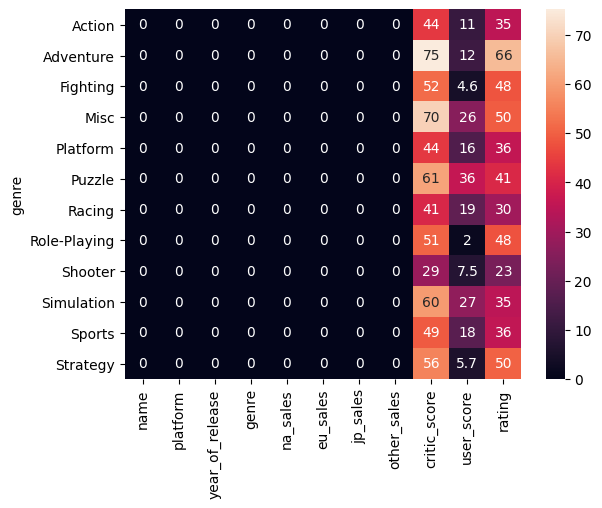

In [8]:
import seaborn as sns

sns.heatmap(df.groupby("genre").apply(lambda x: x.isnull().mean().round(4) * 100), annot = True)

In [9]:
#Rellenar valores ausentes con una cadena vacía en la Columna 'name', 'genre' y 'rating'
df['name'] = df['name'].fillna('Desconocido')
df['genre'] = df['genre'].fillna('Desconocido')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Realizaste un excelente trabajo al analizar los valores nulos que podrían sesgar nuestros resultados. Además, es una buena práctica no eliminarlos, sino reemplazarlos con un identificador que indique que carecen de valor en alguna de las variables.
</div>

- Se cambió el tipo de dato de la columna 'year_of_release' ya que se refiere a un año en específico y no puede tener decimales.
- Se cambió el tipo de dato de la columna 'user_score' ya que se refiere a números y no puede estar referido como string.
- Se rellenaron con cadenas vacías los valores ausentes en la columna 'name' ya que no se pueden obtener el mean() de strings.
- Se rellenaron con cadenas vacías los valores ausentes en la columna 'genre' ya que no se pueden obtener el mean() de strings.
- Se rellenaron con la media los valores ausentes en la columna 'critic_score' para obenter el promedio de puntos.

In [10]:
#Cálculo de as ventas totales (la suma de las ventas en todas las regiones) para cada juego y colocar estos valores en una columna separada.
df['Total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         0.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         0.0    NaN   

   Total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

In [11]:
#INICIO PASO 3

#cuántos juegos fueron lanzados en diferentes años
release_counts = df['year_of_release'].value_counts().sort_index()
print(release_counts)

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


In [12]:
#Categorizacion y agrupación de video juegos por año en 4 categorías
#Creación de nueva columna con categorización
def era_group(year):
    if year < 1980:
        return 'retro'
    elif year <= 1990:
        return 'modern'
    elif year <= 2000:
        return 'milenials'
    elif year >= 2000:
        return 'recent'
    else:
        return 'unknown'
    
df['era_group'] = df['year_of_release'].apply(era_group)
print(df.head())

df_grouped = df.groupby('era_group')
df_sum_na = df_grouped['na_sales'].sum()
df_sum_eu = df_grouped['eu_sales'].sum()
df_sum_jp = df_grouped['jp_sales'].sum()
df_sum_other = df_grouped['other_sales'].sum()
print(df_sum_na)
print(df_sum_eu)
print(df_sum_jp)
print(df_sum_other)

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         0.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         0.0    NaN   

   Total_sales  era_group  
0        82.54     recent  
1        40.24     modern  
2 

In [13]:
#Plataformas con mayores ventas
#Agrupar ventas totales por plataforma y año
platform_sales = df.groupby(['platform', 'year_of_release'])['Total_sales'].sum().reset_index()
print(platform_sales)

    platform  year_of_release  Total_sales
0       2600                0        10.50
1       2600             1980        11.38
2       2600             1981        35.68
3       2600             1982        28.88
4       2600             1983         5.84
..       ...              ...          ...
249       XB             2008         0.18
250     XOne             2013        18.96
251     XOne             2014        54.07
252     XOne             2015        60.14
253     XOne             2016        26.15

[254 rows x 3 columns]


In [14]:
#Buscar plataformas con las mayores ventas totales
total_platform_sales = df.groupby('platform')['Total_sales'].sum().sort_values(ascending=False)
top_platforms = total_platform_sales.head(5).index.tolist()
print(top_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS']


In [15]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'Total_sales', 'era_group'],
      dtype='object')


In [17]:
#Filtrando datos incluyendo las plataformas mas populares
top_platform_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]
print(top_platform_sales)

    platform  year_of_release  Total_sales
27        DS                0         3.34
28        DS             1985         0.02
29        DS             2004        17.27
30        DS             2005       130.14
31        DS             2006       119.81
..       ...              ...          ...
235     X360             2012        99.74
236     X360             2013        88.58
237     X360             2014        34.74
238     X360             2015        11.96
239     X360             2016         1.52

[62 rows x 3 columns]


In [18]:
#Filtrando datos para incluir solo los años desde 2012 hasta 2016
top_platform_sales = top_platform_sales[(top_platform_sales['year_of_release'] >= 2012) & (top_platform_sales['year_of_release'] <= 2016)]

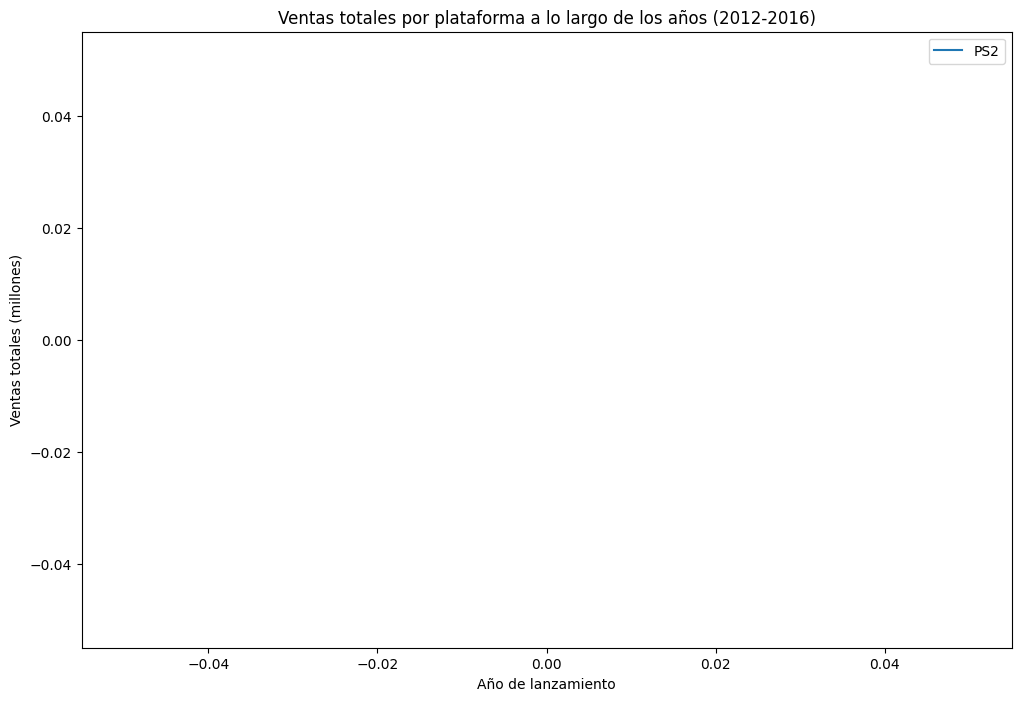

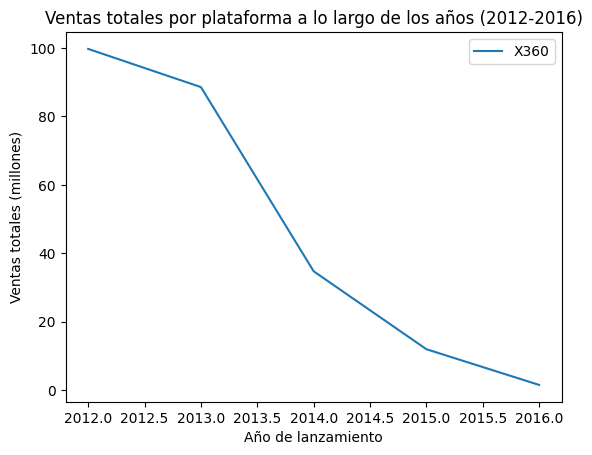

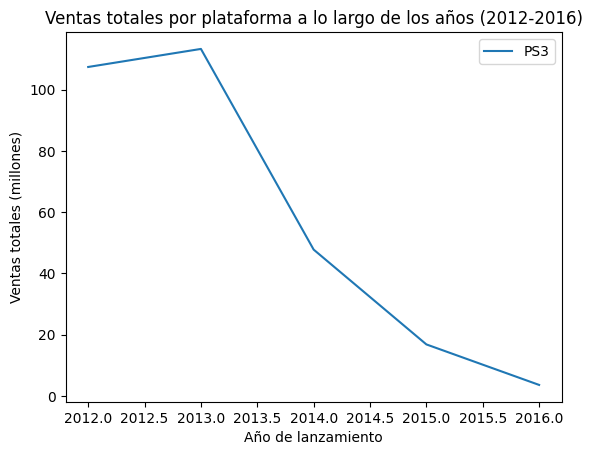

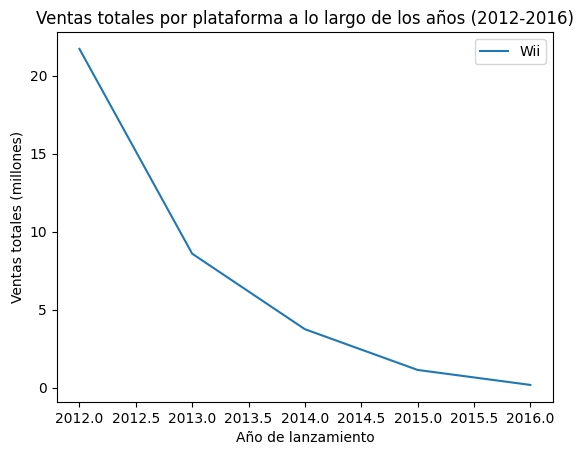

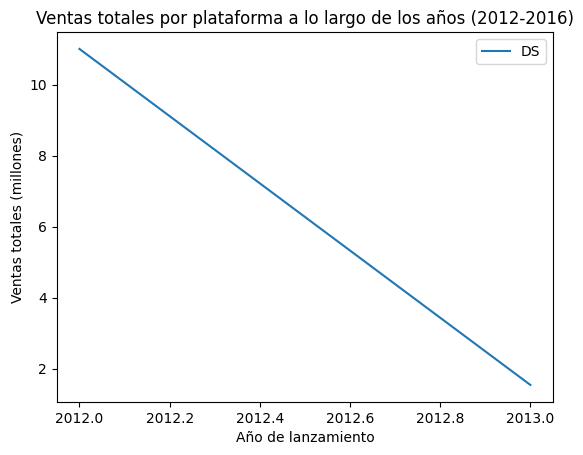

In [19]:
#Visualizacion de las ventas totales de las plataformas más populares
plt.figure(figsize=(12,8))
for platform in top_platforms:
    platform_data = top_platform_sales[top_platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'],
             platform_data['Total_sales'],
             label=platform)
    
    plt.title('Ventas totales por plataforma a lo largo de los años (2012-2016)')
    plt.xlabel('Año de lanzamiento')
    plt.ylabel('Ventas totales (millones)')
    plt.legend()
    plt.show()

In [69]:
#Análisis de plataformas que solían ser populares y ahora no tienen ventas
lastest_year = top_platform_sales['year_of_release'].max()
platform_sales_last_year = platform_sales[platform_sales['year_of_release'] == lastest_year]
platforms_no_sales_now = total_platform_sales.index.difference(platform_sales_last_year['platform'])
print(f"Plataformas que solían ser populares pero que ahora no tienen ventas: {platforms_no_sales_now.tolist()}")

Plataformas que solían ser populares pero que ahora no tienen ventas: ['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


In [70]:
#Análisis cuanto tardan las nuevas plataformas en aparecer y las antiguas en desaparecer
platform_appearance = df.groupby('platform')['year_of_release'].min().sort_values(ascending=False)
platform_disappearance = df.groupby('platform')['year_of_release'].max().sort_values(ascending=False)
print(platform_appearance)
print(platform_disappearance)

platform
XOne    2013
PS4     2013
WiiU    2012
WS      1999
DC      1998
PCFX    1996
TG16    1995
SAT     1994
3DO     1994
NG      1993
SCD     1993
GG      1992
SNES    1990
GEN     1990
NES     1983
PSV        0
Wii        0
X360       0
XB         0
2600       0
PSP        0
PS3        0
PS2        0
PC         0
N64        0
GC         0
GBA        0
GB         0
DS         0
3DS        0
PS         0
Name: year_of_release, dtype: int64
platform
XOne    2016
3DS     2016
X360    2016
WiiU    2016
Wii     2016
PSV     2016
PC      2016
PS4     2016
PS3     2016
PSP     2015
DS      2013
PS2     2011
DC      2008
XB      2008
GBA     2007
GC      2007
PS      2003
N64     2002
WS      2001
GB      2001
SAT     1999
SNES    1999
PCFX    1996
NG      1996
3DO     1995
TG16    1995
NES     1994
SCD     1994
GEN     1994
GG      1992
2600    1989
Name: year_of_release, dtype: int64


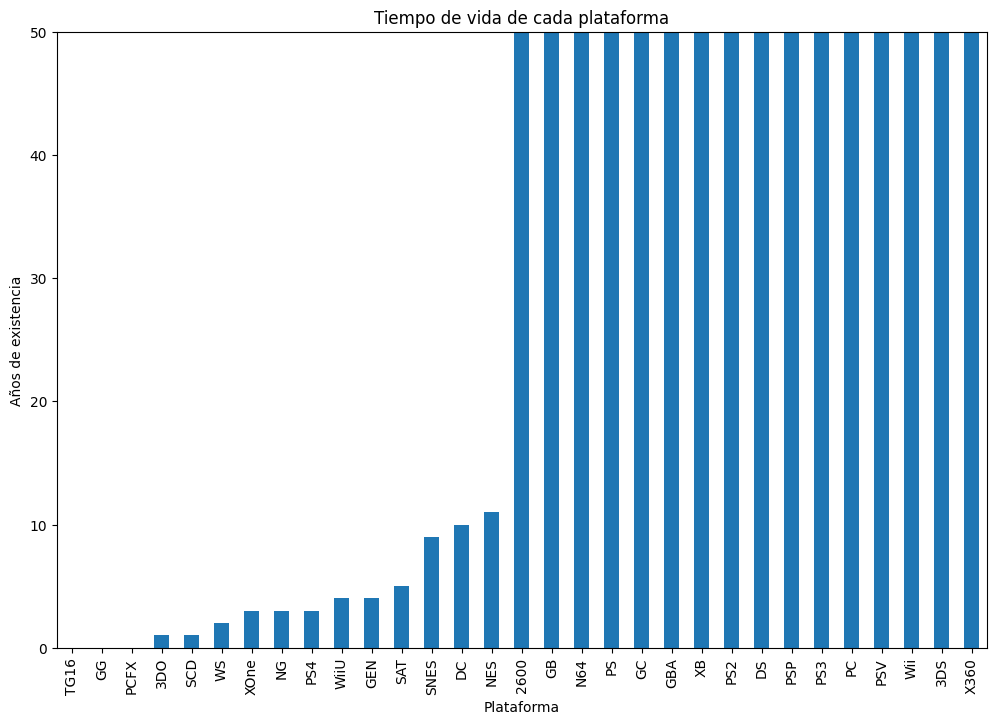

In [71]:
#Visualización de tiempo de vida de cada plataforma
platform_lifespan = platform_disappearance - platform_appearance
platform_lifespan = platform_lifespan.sort_values()

plt.figure(figsize=(12, 8))
platform_lifespan.plot(kind='bar')
plt.title('Tiempo de vida de cada plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Años de existencia')
plt.ylim(0, 50)
plt.show()

1. Estas son las tendencias de ventas de las plataformas mas populares
['PS2', 'X360', 'PS3', 'Wii', 'DS']

2. La tendecia en las plataformas de acuerdo a los gráficos:
PS2: Decreciente
X360: Decreciente
PS3: Decreciente
Wii: Decreciente
DS: Decreciente

3. Para identificar las plataformas líderes en ventas crecientes o decrecientes y las platadormas potencialmente rentables de los últimos 10 años (2006-2016)

In [72]:
#Filtrando datos incluyendo solo los últimos 10 años (2007-2016)
recent_data = df[df['year_of_release'] >= 2007]

In [73]:
#Cálculo de ventas totales por plataforma en los últimos 10 años
recent_platform_sales = recent_data.groupby('platform')['Total_sales'].sum().sort_values(ascending=False)
print(recent_platform_sales)

platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
3DS     257.81
PSP     183.31
PS2     162.38
PC      160.57
XOne    159.32
WiiU     82.19
PSV      53.81
GBA       3.40
XB        0.73
GC        0.27
DC        0.06
Name: Total_sales, dtype: float64


In [74]:
#Identificando las plataformas líderes en ventas
top_recent_platforms = recent_platform_sales.head(5).index.tolist()
print(top_recent_platforms)

['PS3', 'X360', 'Wii', 'DS', 'PS4']


In [75]:
#Filtro de datos incluyendo solo plataformas más populares en los últimos 10 años
top_recent_platforms_sales = recent_data[recent_data['platform'].isin(top_recent_platforms)]
print(top_recent_platforms_sales)

                                name platform  year_of_release       genre  \
2                     Mario Kart Wii      Wii             2008      Racing   
3                  Wii Sports Resort      Wii             2009      Sports   
8          New Super Mario Bros. Wii      Wii             2009    Platform   
13                           Wii Fit      Wii             2007      Sports   
14                Kinect Adventures!     X360             2010        Misc   
...                              ...      ...              ...         ...   
16691   Dynasty Warriors: Eiketsuden      PS3             2016      Action   
16698               Mega Brain Boost       DS             2008      Puzzle   
16700       Mezase!! Tsuri Master DS       DS             2009      Sports   
16704                       Plushees       DS             2008  Simulation   
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

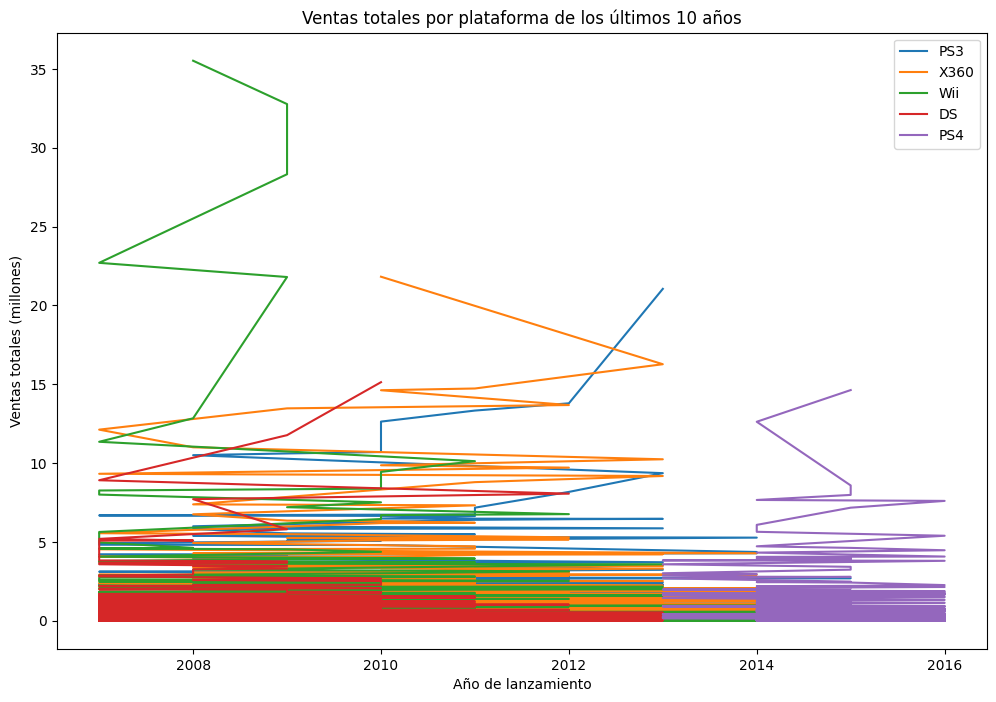

In [76]:
#Visualización de ventas totales de plataformas más populares de los últimos años
plt.figure(figsize=(12, 8))
for platform in top_recent_platforms:
    platform_data = top_recent_platforms_sales[top_recent_platforms_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['Total_sales'], label=platform)
    
plt.title('Ventas totales por plataforma de los últimos 10 años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend()
plt.show()

In [20]:
#Diagrama de caja para ventas globales de todos los juegos por plataforma
#plt.figure(figsize=(14,10))
#sns.boxplot(x='platform', y='Total_sales', data=top_recent_platforms_sales)
#plt.title('Diagrama de caja de ventas globales por plataforma')
#plt.xlabel('Plataforma')
#plt.ylabel('Ventas globales (millones)')
#plt.ylim(0, 4)
#plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

1. Las diferencias son significativas, podemos ver como X360, PS3 y PS4, tienen un máximo de ventas de 1.7 a 1.8 millones de ventas, en cambio WII tiene ventas máximas de 1.0 millones y D5 de 0.7 millones.

2. Las ventas promedio de las plataformas WII, X360, PS3 Y PS4 son muy parecidas fluctuan desde 0.3 a 0.25 millones de ventas, menos D5 que tiene 0.2 millones de ventas.

3. Al final dejaremos como script(#) los gráficos de box-plot ya que pueden sesgar nuestros resultados al final de nuestra hipótesis.

In [78]:
#Análisis de reseñas de usuarios y profesionales afectan las ventas la plataforma PS4.
ps4_data = df[df['platform'] == 'PS4']

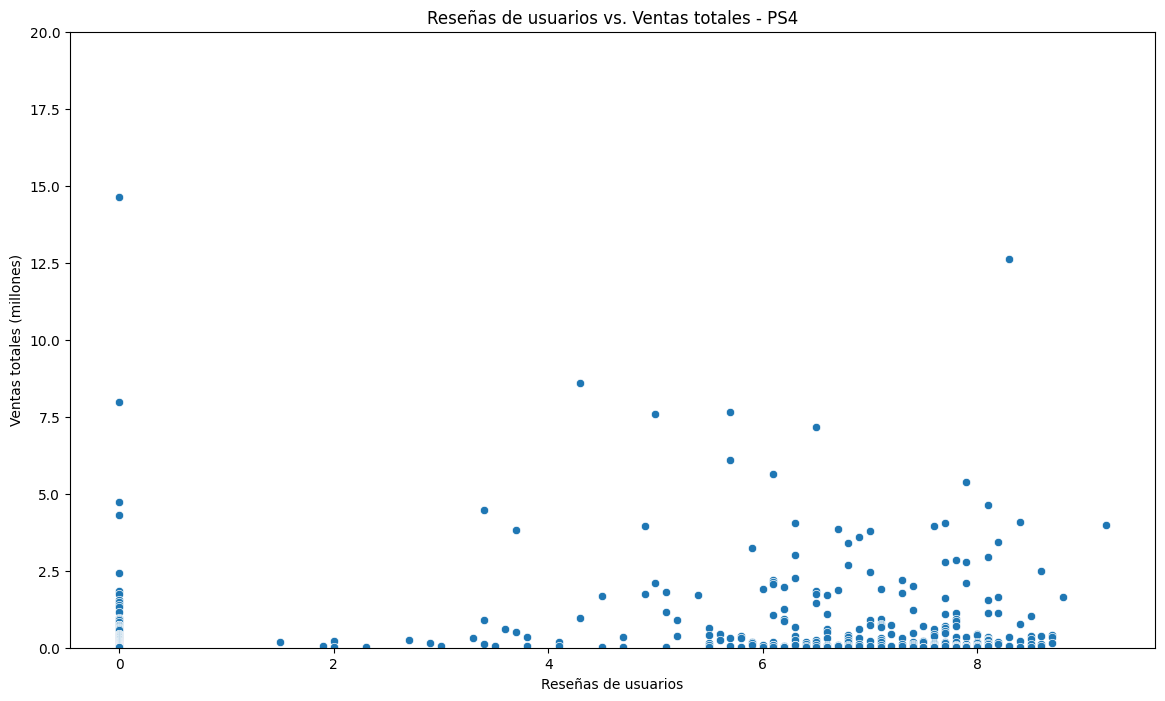

In [79]:
#Gráfico de dispersión: Reseñas de usuarios vs Ventas totales
plt.figure(figsize=(14, 8))
sns.scatterplot(x='user_score', y='Total_sales', data=ps4_data)
plt.title('Reseñas de usuarios vs. Ventas totales - PS4')
plt.xlabel('Reseñas de usuarios')
plt.ylabel('Ventas totales (millones)')
plt.ylim(0, 20)
plt.show()

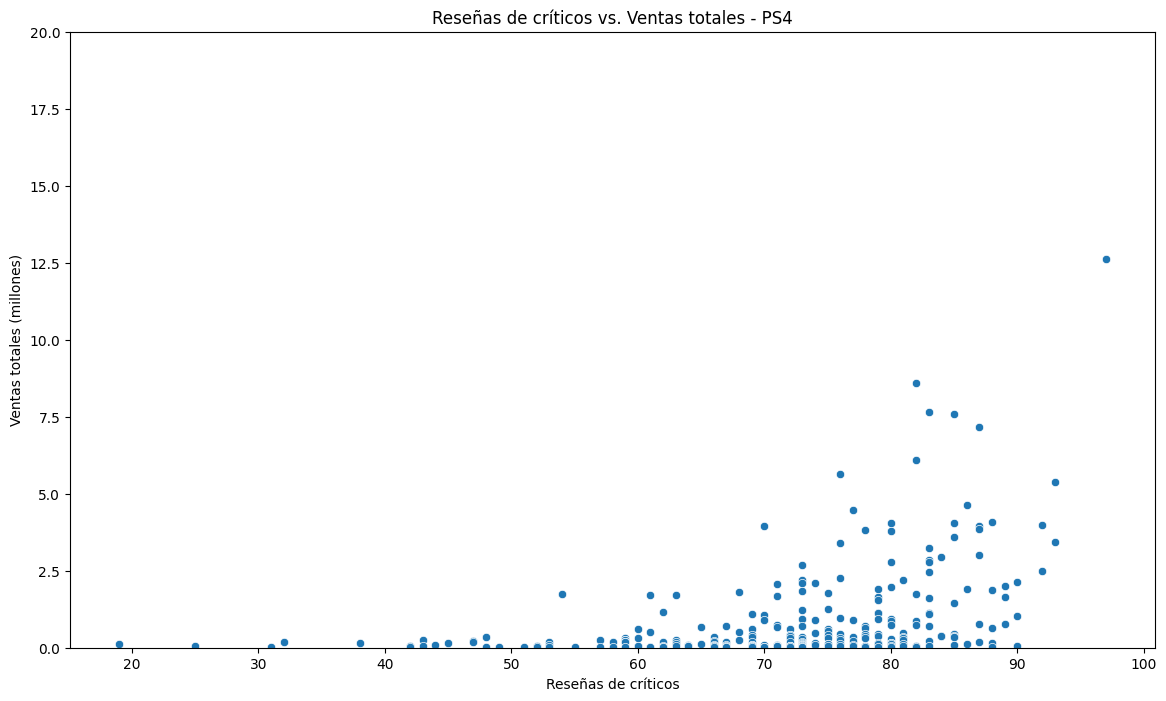

In [80]:
#Gráfico de dispersión: Reseñas de críticos vs Ventas totales
plt.figure(figsize=(14, 8))
sns.scatterplot(x='critic_score', y='Total_sales', data=ps4_data)
plt.title('Reseñas de críticos vs. Ventas totales - PS4')
plt.xlabel('Reseñas de críticos')
plt.ylabel('Ventas totales (millones)')
plt.ylim(0, 20)
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

In [81]:
#Calculando la correlación entre las reseñas y las ventas
user_score_corr = ps4_data['user_score'].corr(ps4_data['Total_sales'])
critic_score_corr = ps4_data['critic_score'].corr(ps4_data['Total_sales'])

print(f'Correlación entre las reseñas de usuarios y las ventas totales (PS4): {user_score_corr}')
print(f'Correlación entre las reseñas de críticos y las ventas totales (PS4): {critic_score_corr}')

Correlación entre las reseñas de usuarios y las ventas totales (PS4): 0.10493810283090231
Correlación entre las reseñas de críticos y las ventas totales (PS4): 0.40656790206178095


1. De acuerdo al gráfico de 'Reseñas de usuarios vs. Ventas totales - PS4'. No se tiene una linea clara de la relación ya que mientras aumenta la variable 'x' va aumentando la variable 'y' aumenta y disminuye. La interpretación sería que la reseña de usuarios y las ventas globales disminuyendo tienen una relación positiva muy baja. Esto podemos evidenciarlo con el resultado de la correlación.
2. De acuerdo al gráfico de 'Reseñas de críticos vs. Ventas totales - PS4'. Tenemos una línea recta positiva media ya que mientras aumenta la variable 'x' también aumenta la variable 'y'. La interpretación sería que la reseña de críticos tiende a aumentar al igual que las ventas globales aumentan. Podemos evidenciarlo con el resultado de la correlación.

In [82]:
#Filtrando los datos para incluir solo los juegos disponibles en PS4
ps4_games = df[df['platform'] == 'PS4']['name'].unique()
multi_platform_data = df[df['name'].isin(ps4_games)]

In [83]:
#Cálculo de ventas totales para cada juego en cada plataforma
platform_sales_comparison = multi_platform_data.groupby(['name', 'platform'])['Total_sales'].sum().reset_index()
print(platform_sales_comparison)

                                            name platform  Total_sales
0                                  7 Days to Die      PS4         0.14
1                                  7 Days to Die     XOne         0.05
2     Adventure Time: Finn & Jake Investigations      3DS         0.09
3     Adventure Time: Finn & Jake Investigations      PS3         0.08
4     Adventure Time: Finn & Jake Investigations      PS4         0.10
...                                          ...      ...          ...
1172                                      ZombiU     WiiU         1.01
1173                                      ZombiU     XOne         0.01
1174                         Zombie Army Trilogy      PS4         0.20
1175                         Zombie Army Trilogy     XOne         0.11
1176                        inFAMOUS: Second Son      PS4         2.79

[1177 rows x 3 columns]


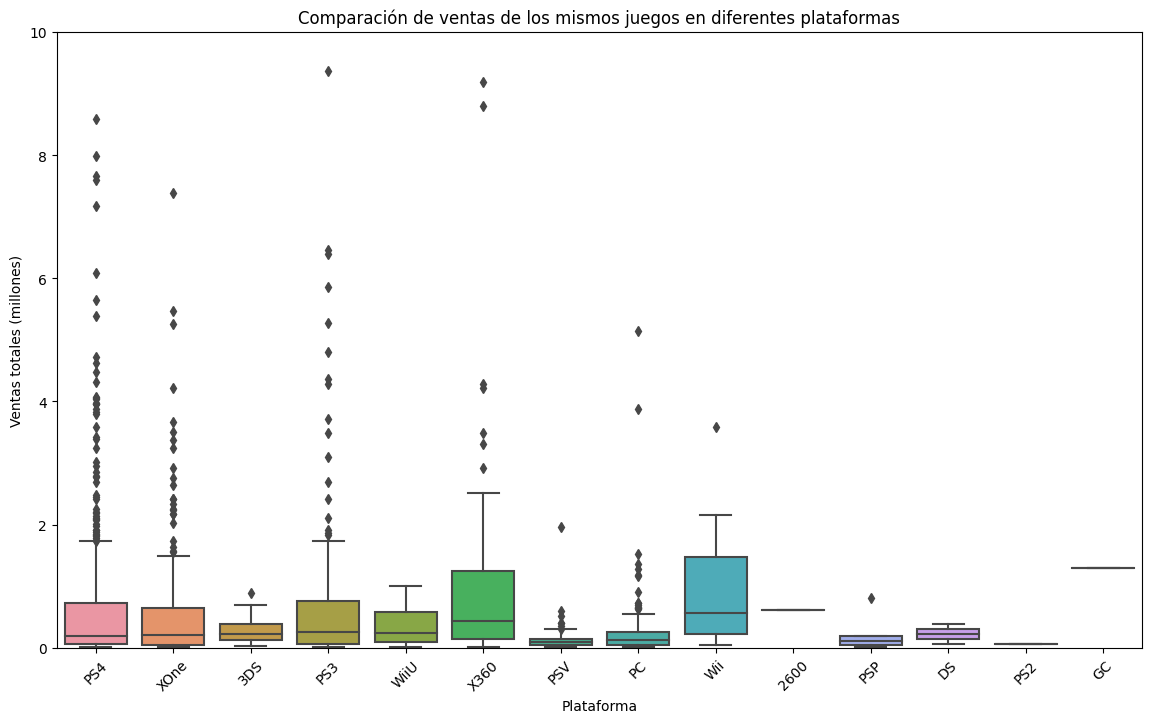

In [84]:
#Visualización de ventas de los mismos juegos en diferentes plataformas
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='Total_sales', data=platform_sales_comparison)
plt.title('Comparación de ventas de los mismos juegos en diferentes plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.ylim(0, 10)
plt.xticks(rotation=45)
plt.show()

In [85]:
#Cálculo de ventas promedio para los mismos juegos en diferentes plataformas
avg_sales_per_platform = platform_sales_comparison.groupby('platform')['Total_sales'].mean().sort_values(ascending=False)
print(avg_sales_per_platform)

platform
GC      1.300000
X360    1.129646
Wii     1.020000
PS3     0.850393
PS4     0.801378
2600    0.620000
XOne    0.596129
WiiU    0.342703
PC      0.294746
3DS     0.289474
PSP     0.236000
DS      0.220000
PSV     0.144512
PS2     0.060000
Name: Total_sales, dtype: float64


In [86]:
#Agrupación de los datos por género y análisis de ventas totales por género
genre_sales = df.groupby('genre')['Total_sales'].sum().sort_values(ascending=False).reset_index()
print(genre_sales)

           genre  Total_sales
0         Action      1744.17
1         Sports      1331.27
2        Shooter      1052.45
3   Role-Playing       934.56
4       Platform       827.77
5           Misc       802.51
6         Racing       728.67
7       Fighting       447.53
8     Simulation       389.97
9         Puzzle       242.57
10     Adventure       237.59
11      Strategy       174.23
12   Desconocido         2.42


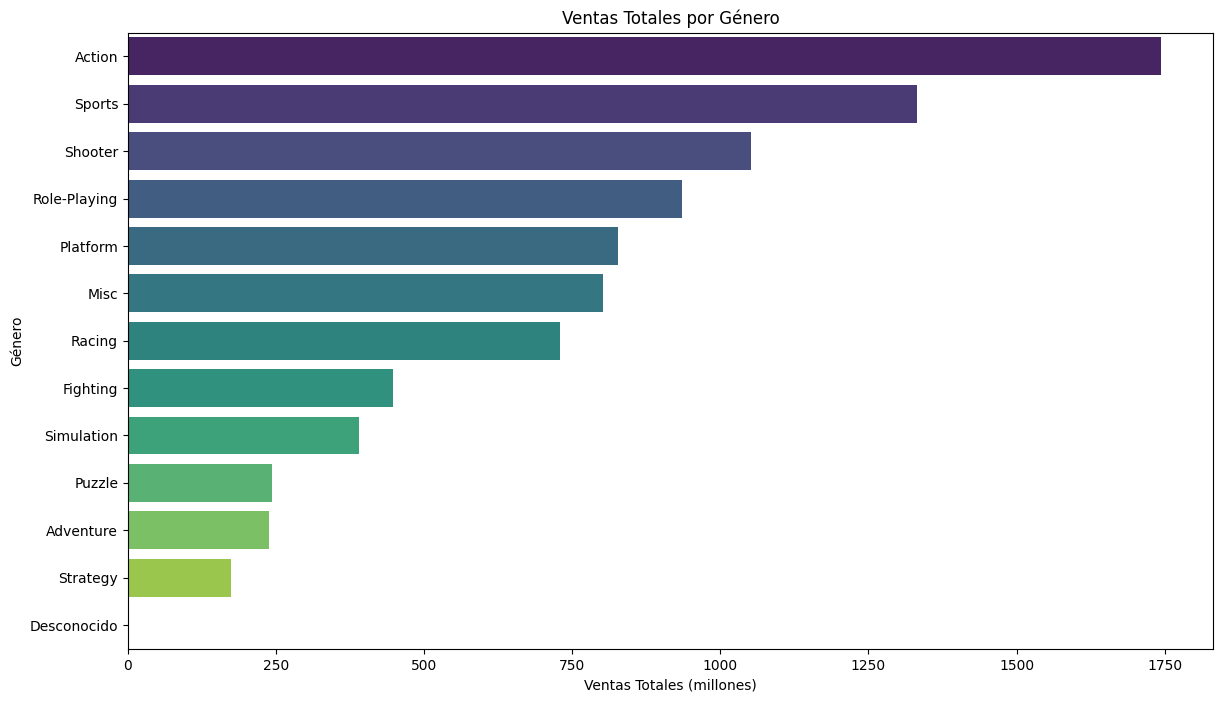

In [87]:
#Visualización de distribución de ventas totales por género (gráfico de barras)
plt.figure(figsize=(14,8))
sns.barplot(x='Total_sales', y='genre', data=genre_sales, palette='viridis')
plt.title('Ventas Totales por Género')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Género')
plt.show()

In [88]:
#Cálculo de estadísticas descriptivas de ventas por género
genre_sales_stats = df.groupby('genre')['Total_sales'].describe().sort_values(by='mean', ascending=False)
print(genre_sales_stats)

               count      mean       std   min   25%   50%     75%    max
genre                                                                    
Desconocido      2.0  1.210000  1.668772  0.03  0.62  1.21  1.8000   2.39
Platform       888.0  0.932173  2.574506  0.01  0.09  0.27  0.7825  40.24
Shooter       1323.0  0.795503  1.816425  0.01  0.08  0.24  0.7300  28.31
Role-Playing  1498.0  0.623872  1.710178  0.01  0.07  0.18  0.5200  31.38
Racing        1249.0  0.583403  1.656602  0.00  0.07  0.19  0.5300  35.52
Sports        2348.0  0.566980  2.084778  0.00  0.09  0.22  0.5500  82.54
Fighting       849.0  0.527126  0.952304  0.01  0.08  0.21  0.5500  12.84
Action        3369.0  0.517711  1.145597  0.01  0.07  0.19  0.4900  21.05
Misc          1750.0  0.458577  1.304635  0.01  0.06  0.16  0.4000  28.91
Simulation     873.0  0.446701  1.186820  0.01  0.05  0.15  0.4200  24.67
Puzzle         580.0  0.418224  1.562444  0.01  0.04  0.11  0.3025  30.26
Strategy       683.0  0.255095  0.5189

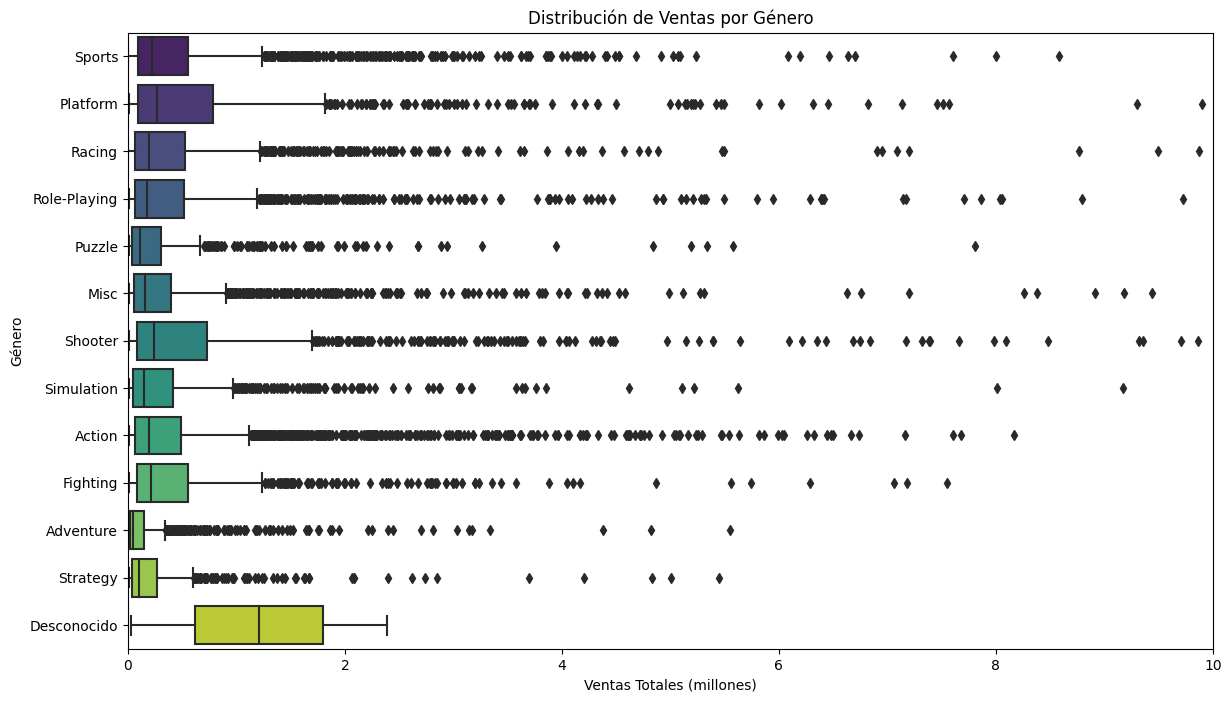

In [89]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Total_sales', y='genre', data=df, palette='viridis')
plt.title('Distribución de Ventas por Género')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Género')
plt.xlim(0, 10)
plt.show()

Con esta estadística descriptiva por género de juego nos ayudará a entender mejor la distribución de ventas.
1. Se puede decir que es mas rentable invertir en juegos de género : Action, Sports y Shooter. 

In [90]:
#PASO 4

#1. Determinar las 5 platadormas principales en cada región.

#Función para obtener las cinco plataformas principales por región
def top_platforms_by_region(region_sales):
    top_platforms = df.groupby('platform')[region_sales].sum().sort_values(ascending=False).head(5)
    return top_platforms

In [91]:
#Obtener las cinco plataformas principales para cada región
top_platforms_na = top_platforms_by_region('na_sales')
top_platforms_eu = top_platforms_by_region('eu_sales')
top_platforms_jp = top_platforms_by_region('jp_sales')

print("Top 5 plataformas en NA:")
print(top_platforms_na)
print("Top 5 plataformas en EU:")
print(top_platforms_eu)
print("Top 5 plataformas en JP:")
print(top_platforms_jp)

Top 5 plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top 5 plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top 5 plataformas en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


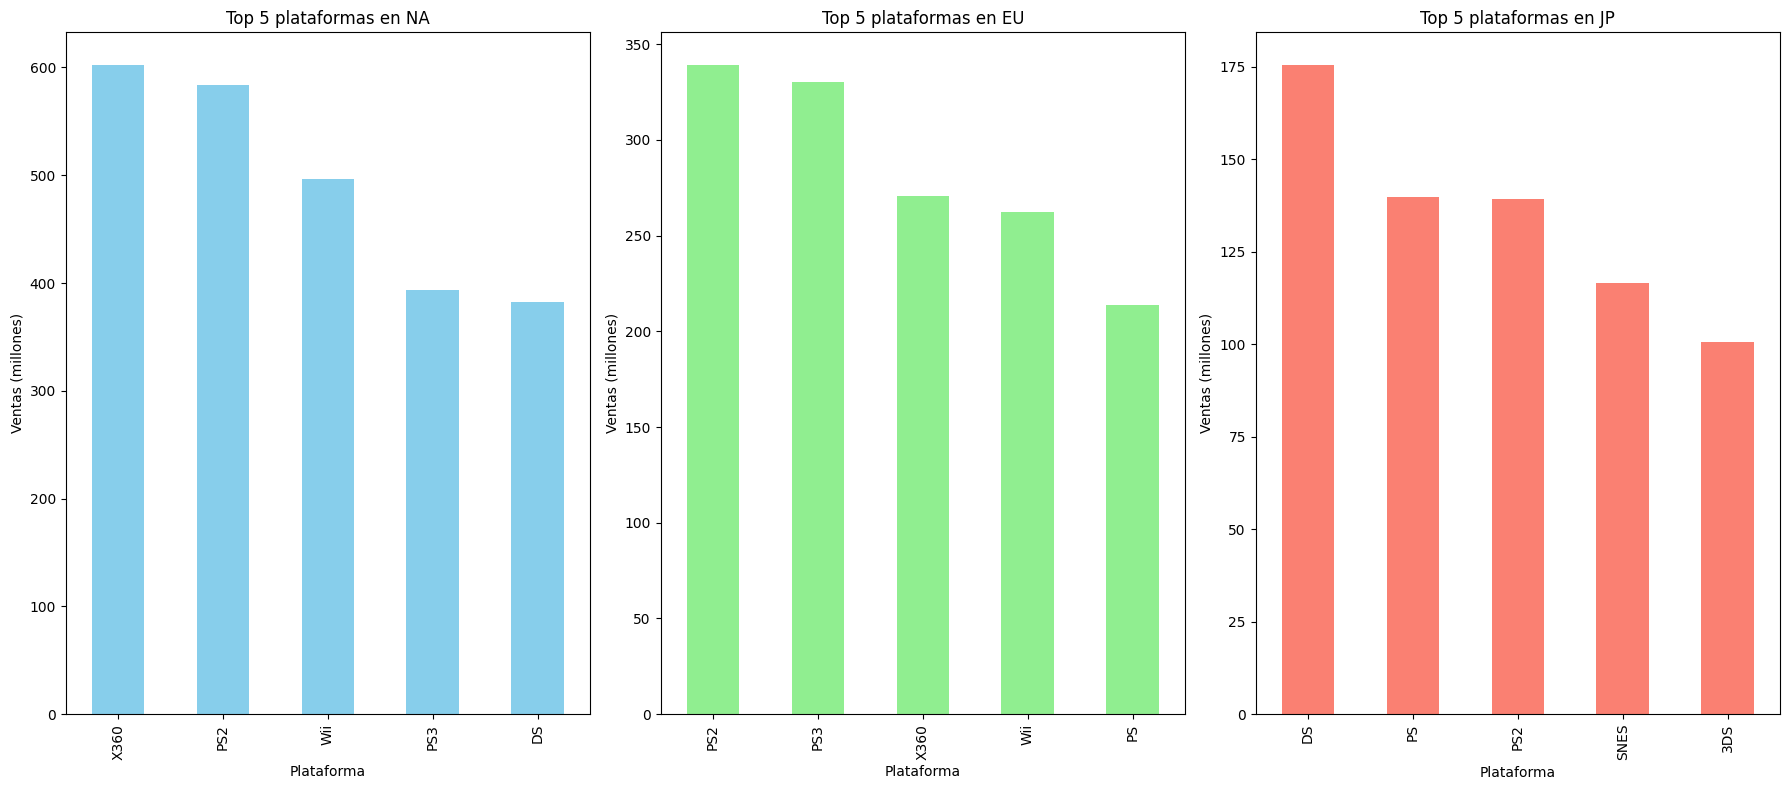

In [92]:
#Visualización de las variaciones en las cuotas de mercado
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 plataformas en NA')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='bar', color='lightgreen')
plt.title('Top 5 plataformas en EU')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='bar', color='salmon')
plt.title('Top 5 plataformas en JP')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()

In [93]:
#2. Determinar los cinco géneros principales en cada región

#Función para obtener los cinco géneros principales por región
def top_genres_by_region(region_sales):
    top_genres = df.groupby('genre')[region_sales].sum().sort_values(ascending=False).head(5)
    return top_genres

#Obtener los cinco géneros principales para cada región
top_genres_na = top_genres_by_region('na_sales')
top_genres_eu = top_genres_by_region('eu_sales')
top_genres_jp = top_genres_by_region('jp_sales')

print("Top 5 géneros en NA")
print(top_genres_na)
print("Top 5 géneros en EU")
print(top_genres_eu)
print("Top 5 géneros en JP")
print(top_genres_jp)

Top 5 géneros en NA
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top 5 géneros en EU
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top 5 géneros en JP
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


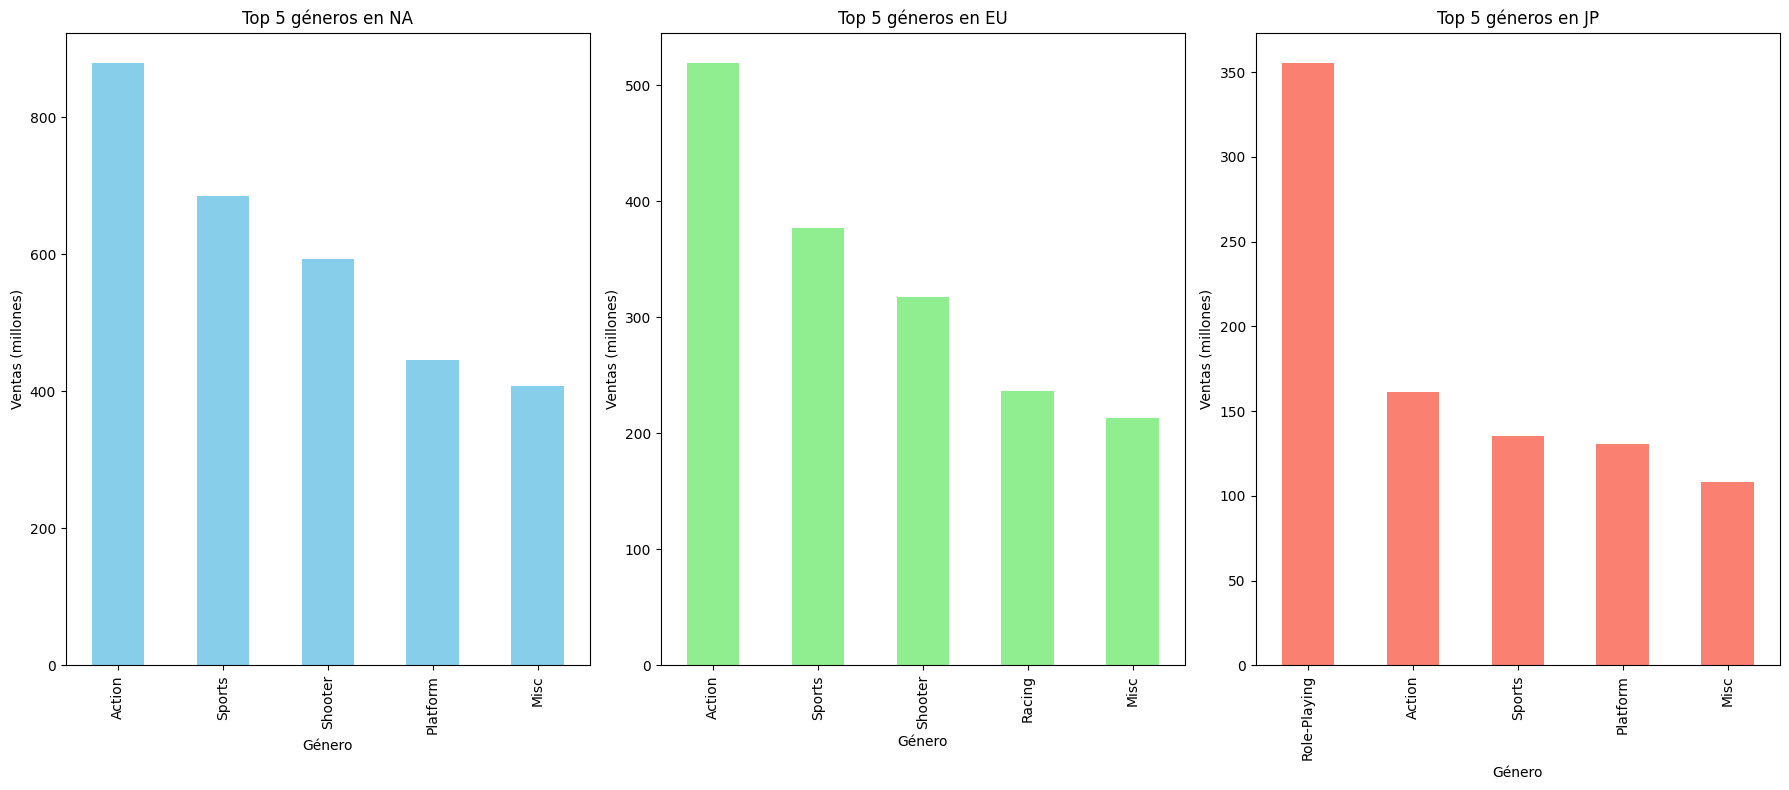

In [94]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar', color='skyblue')
plt.title('Top 5 géneros en NA')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='bar', color='lightgreen')
plt.title('Top 5 géneros en EU')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='bar', color='salmon')
plt.title('Top 5 géneros en JP')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()

In [95]:
#3.Análisis de clasicicación de ESRB (Software de Entretenimiento)
#Si es que afectan a las ventas en las regiones individuales.

#Función para calcular la correlación entre las clasificaciones de ESRB y las ventas por región
def esrb_sales_correlation(region_sales):
    esrb_sales = df.groupby('rating')[region_sales].sum().reset_index()
    esrb_sales = esrb_sales[esrb_sales['rating'].notnull()]
    return esrb_sales

In [96]:
#Obtener las correlaciones para cada región
esrb_sales_na = esrb_sales_correlation('na_sales')
esrb_sales_eu = esrb_sales_correlation('eu_sales')
esrb_sales_jp = esrb_sales_correlation('jp_sales')

print("Ventas por clasificación ESRB en NA")
print(esrb_sales_na)
print("Ventas por clasificación ESRB en EU")
print(esrb_sales_eu)
print("Ventas por clasificación ESRB en JP")
print(esrb_sales_jp)

Ventas por clasificación ESRB en NA
  rating  na_sales
0     AO      1.26
1      E   1292.99
2   E10+    353.32
3     EC      1.53
4    K-A      2.56
5      M    748.48
6     RP      0.00
7      T    759.75
Ventas por clasificación ESRB en EU
  rating  eu_sales
0     AO      0.61
1      E    710.25
2   E10+    188.52
3     EC      0.11
4    K-A      0.27
5      M    483.97
6     RP      0.08
7      T    427.03
Ventas por clasificación ESRB en JP
  rating  jp_sales
0     AO      0.00
1      E    198.11
2   E10+     40.20
3     EC      0.00
4    K-A      1.46
5      M     64.24
6     RP      0.00
7      T    151.40


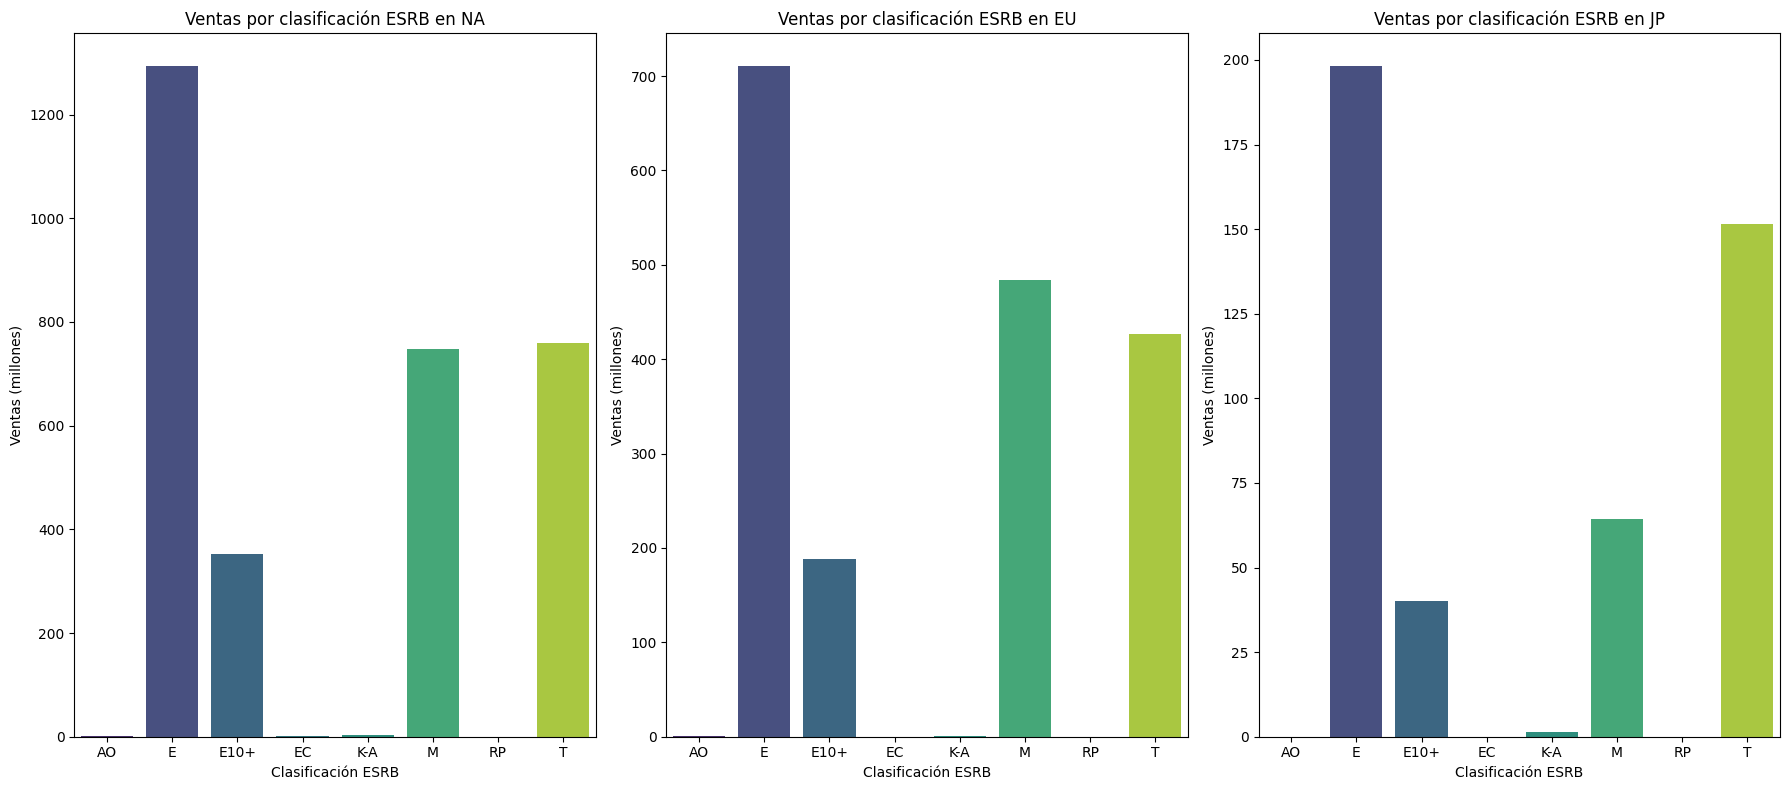

In [97]:
#Visualización de ventas por clasificación ESRB
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sns.barplot(x='rating', y='na_sales', data=esrb_sales_na, palette='viridis')
plt.title('Ventas por clasificación ESRB en NA')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 2)
sns.barplot(x='rating', y='eu_sales', data=esrb_sales_eu, palette='viridis')
plt.title('Ventas por clasificación ESRB en EU')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 3)
sns.barplot(x='rating', y='jp_sales', data=esrb_sales_jp, palette='viridis')
plt.title('Ventas por clasificación ESRB en JP')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()

1. Conclusiones en Plataformas líderes en ventas:
Las plataformas principales varían significativamente entre las regiones. En las regiones NA y EU plataformas como PlayStation y Xbox son más populares, mientras que Nintendo tiene una fuerte presencia en la región JP.
2. Cuotas de mercado:
Las cuotas de mercado muestran algunas diferencias, con algunas plataformas que dominan en una región y otras que no son tan populares en otra.
3. Géneros Principales:
Los géneros principales también tienen diferencia de acuerdo a las regiones. Los juegos RGP son mas populares en JP, mientras que los shooters son mas populares y mayor cuota de mercado en NA.
4. Clasificaciones ESRB:
Tiene similitudes y diferencias de acuerdo a la región.
La clasificación E en todas las regiones es la más alta, la clasificación E10+ en todas las regiones es la más baja.
La clasificación M y T son las que muestran diferencias en todas las regiones.

In [135]:
#PASO 5 - PRUEBAS DE HIPÓTESIS

#1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [136]:
#Rellenando los valores NaN con la media de cada plataforma
mean_xbox_one = df[df['platform'] == 'XOne']['user_score'].mean()
mean_pc = df[df['platform'] == 'PC']['user_score'].mean()

df.loc[df['platform'] == 'XOne', 'user_score'] = df.loc[df['platform'] == 'XOne', 'user_score'].fillna(mean_xbox_one)
df.loc[df['platform'] == 'PC', 'user_score'] = df.loc[df['platform'] == 'PC', 'user_score'].fillna(mean_pc)

In [137]:
#Filtrando los datos para las plataformas Xbox One y PC
xbox_one_scores = df[df['platform'] == 'XOne']['user_score']
pc_scores = df[df['platform'] == 'PC']['user_score']

In [138]:
#Nos volvemos a asegurar de que ninguno de los grupos estén vacíos
if xbox_one_scores.empty or pc_scores.empty:
    print("Uno de los grupos está vacío después de eliminar NaN. No se puede realizar la prueba Hipótesis")
elif xbox_one_scores.nunique() == 1 or pc_scores.nunique() == 1:
    print("Uno de los grupos no tiene variabilidad. No se puede realizar la prueba de Hipótesis")
else:
    print("realizar prueba de Hipótesis")

realizar prueba de Hipótesis


In [139]:
#Prueba de Hipótesis de igualdad de las medias para Xbox y PC
t_stat_xbox_pc, p_value_xbox_pc = st.ttest_ind(xbox_one_scores, pc_scores)

alpha = 0.05

print("Hipótesis 1: Comparación de calificaciones promedio de usuarios entre Xbox One y PC")
print("Estadístico t:", t_stat_xbox_pc)
print("Valor p:", p_value_xbox_pc)

if p_value_xbox_pc < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")
    

Hipótesis 1: Comparación de calificaciones promedio de usuarios entre Xbox One y PC
Estadístico t: -4.09328248747214
Valor p: 4.5330069270996594e-05
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


In [ ]:
# Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [141]:
#Relleno de valores NaN con la media de cada género
mean_action = df[df['genre'] == 'Action']['user_score'].mean()
mean_sports = df[df['genre'] == 'Sports']['user_score'].mean()

df.loc[df['genre'] == 'Action', 'user_score'] = df.loc[df['genre'] == 'Action', 'user_score'].fillna(mean_action)
df.loc[df['genre'] == 'Sports', 'user_score'] = df.loc[df['genre'] == 'Sports', 'user_score'].fillna(mean_sports)

In [142]:
#Filtrando datos para los géneros de Action y Sports
action_scores = df[df['genre'] == 'Action']['user_score']
sports_scores = df[df['genre'] == 'Sports']['user_score']

In [143]:
#Nos aseguramos que ambos grupos no estén vacíos
if action_scores.empty or sports_scores.empty:
    print("Uno de los grupos está vacío después de eliminar NaN. No se puede realizar la prueba t.")
elif action_scores.nunique() == 1 or sports_scores.nunique() == 1:
    print("Uno de los grupos no tiene variabilidad. No se puede realizar la prueba t.")
else:
    print("realizar prueba de Hipótesis")

realizar prueba de Hipótesis


In [145]:
t_stat_action_sports, p_value_action_sports = st.ttest_ind(action_scores, sports_scores, equal_var=False)

alpha = 0.05

print("Hipótesis 2: Comparación de calificaciones de usuarios entre los géneros de Acción y Deportes")
print("Estadístico t:", t_stat_action_sports)
print("Valor p:", p_value_action_sports)

if p_value_action_sports < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son iguales.")

Hipótesis 2: Comparación de calificaciones de usuarios entre los géneros de Acción y Deportes
Estadístico t: 3.423366472296363
Valor p: 0.0006233429761567189
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.


Explicación:
1. Eliminé los valoers Nan.
2. Rellené los valores faltantes con la media en las plataformas 'XOne' y 'PC' y en los géneros 'Action' y 'Sports'.
3. Verifiqué nuavamente con una función si los datos están vacíos despues de rellenarlos.
4. Utilicé la prueba ed Hipótesis sobre igualdad de las medias ya que tenemos poblaciones con datos distintos tanto en las plafaformas y en los géneros.
5. El Código que he utilizado me permitirá verificar las dos hipótesis propuestas.

6. CONCLUSIÓN GENERAL
La conclusión general es que los juegos del género 'Action'(Acción) y 'Sports'(Deportes) en NA y NU son los más pedidos y jugados, en cambio 'Role_Playng'(Juego de Roles) es el más jugado en JP. Esto también se ve reflejado en los números de las ventas por millones.
Con respecto a las plataformas más utilizadas, X360, PS2, PS3 y WII son las más usadas en NA y NU, en cambio DS Y PS son las mas usadas en JP.
Por último las ventas por millones de dólares de los últimos 10 años (2007-2016), está liderada por PS3, X360 y Wii, con los siguientes números:
PS3     910.38
X360    901.37
Wii     754.03